In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/music_features.csv')

In [ ]:
data=pd.DataFrame(data)
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.6892,2106.541053,88609.74951,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.7095,2068.942009,82426.01673,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075269,0.081651,0.000322,2077.526598,231657.9680,1927.293153,74717.12439,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.7311,1818.450280,109090.20720,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [ ]:
data.shape

(1000, 56)

In [ ]:
data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean                 0
mfcc9_var                  0
mfcc10_mean                0
mfcc10_var    

In [ ]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155166,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666325,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185060,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697312,1.843505e+05,1907.240605,67376.554430,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548050,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576800,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811500,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [ ]:
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.6892,2106.541053,88609.74951,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.7095,2068.942009,82426.01673,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075269,0.081651,0.000322,2077.526598,231657.9680,1927.293153,74717.12439,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.7311,1818.450280,109090.20720,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [ ]:
x=data.iloc[:,1:55]
x

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,3805.839606,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,3550.522098,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,3042.260232,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,2184.745799,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,3579.757627,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.6892,2106.541053,88609.74951,4253.557033,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.7095,2068.942009,82426.01673,4149.338328,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,661794,0.432142,0.075269,0.081651,0.000322,2077.526598,231657.9680,1927.293153,74717.12439,4031.405321,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.7311,1818.450280,109090.20720,3015.631004,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [ ]:
cols = x.columns
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(np_scaled, columns = cols)

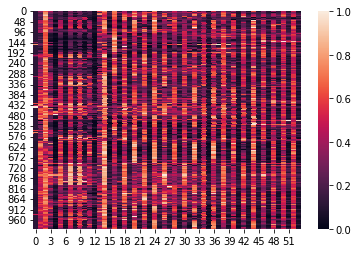

In [ ]:
import seaborn as sns
ax = sns.heatmap(x)

In [ ]:
y=data.iloc[:,55:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.04107339 0.03568107 0.02483938 0.02903972 0.02681935 0.02352563
 0.02211143 0.02555826 0.01464926 0.02742558 0.02273661 0.02001987
 0.01829172 0.01273983 0.03051788 0.01574699 0.01972747 0.01286155
 0.01776443 0.0165543  0.02645876 0.02077876 0.01445735 0.02110063
 0.021472   0.0184905  0.01690965 0.01958291 0.01886518 0.01557682
 0.02127427 0.01354067 0.01582534 0.01607415 0.01570231 0.01265811
 0.01903336 0.01209552 0.01769414 0.0148016  0.01377541 0.01114982
 0.0150442  0.0108667  0.01329582 0.01114164 0.01889611 0.01167565
 0.01282341 0.01401038 0.01138707 0.01615914 0.0127745  0.01692444]


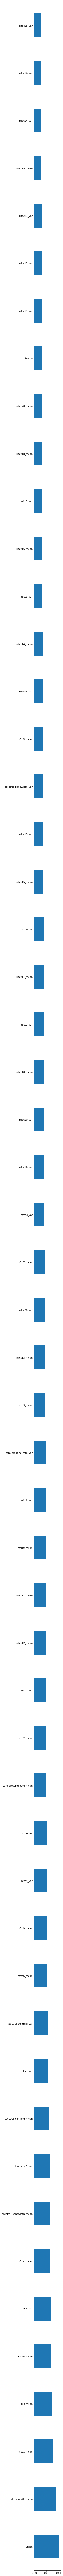

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(56).plot(kind='barh')
plt.rcParams['figure.figsize'] = [100,200]



In [ ]:
x.drop('mfcc15_var', axis=1, inplace=True)
x.drop('mfcc16_var', axis=1, inplace=True) 
x.drop('mfcc14_var', axis=1, inplace=True)
x.drop('mfcc19_mean', axis=1, inplace=True)
x.drop('mfcc17_var', axis=1, inplace=True)
x.drop('mfcc12_var', axis=1, inplace=True)
x.drop('mfcc11_var', axis=1, inplace=True) 



AttributeError: ignored

In [ ]:
x.shape

(1000, 53)

In [ ]:
x=x.values
y=y.values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
def scores(y_test,y_preds,obj,x_test):
  cm = confusion_matrix(y_test,y_preds)
  print('Confusion Matrix: ',cm)
  prec = precision_score(y_test,y_preds,average='macro')
  print('Precision: ',prec*100,'%')
  acc=accuracy_score(y_test,y_preds)
  print('Accuracy: ',acc*100,'%')
  f1 = f1_score(y_test,y_preds,average='macro')
  print('F1 Score:',f1*100,'%')
  


In [ ]:
k_nearest_classifier = KNeighborsClassifier(n_neighbors=2,p=1)
k_nearest_classifier.fit(x_train,y_train)
y_preds_knn=k_nearest_classifier.predict(x_test)
scores(y_test,y_preds_knn,k_nearest_classifier,x_test)

Confusion Matrix:  [[ 6  0  0  0  1  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 2  1 11  2  0  1  0  0  0  1]
 [ 0  0  3  6  0  0  1  0  0  0]
 [ 1  0  1  1  7  0  0  0  1  0]
 [ 0  2  0  1  0  6  0  1  0  0]
 [ 2  0  0  1  0  0  7  0  0  0]
 [ 0  0  1  1  0  1  0  6  2  0]
 [ 0  0  1  1  0  0  0  1  3  0]
 [ 2  0  1  2  0  0  1  0  1  4]]
Precision:  65.20665445665446 %
Accuracy:  62.0 %
F1 Score: 62.24579397210975 %


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
k_nearest_classifier = KNeighborsClassifier(n_neighbors=15,p=1)
k_nearest_classifier.fit(x_train,y_train)
y_preds_knn=k_nearest_classifier.predict(x_test)
scores(y_test,y_preds_knn,k_nearest_classifier,x_test)

Confusion Matrix:  [[ 6  0  0  0  0  0  0  0  1  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 0  1 14  2  0  1  0  0  0  0]
 [ 0  0  2  5  0  0  0  0  0  3]
 [ 0  0  1  2  5  0  0  0  3  0]
 [ 0  2  1  1  0  5  0  0  1  0]
 [ 1  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0 10  1  0]
 [ 1  0  0  1  0  0  0  1  3  0]
 [ 1  0  1  4  0  0  0  0  0  5]]
Precision:  71.042663476874 %
Accuracy:  68.0 %
F1 Score: 67.39531876373982 %


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(C=7,kernel='rbf')
svc_classifier.fit(x_train,y_train)
y_preds_svc=svc_classifier.predict(x_test)
scores(y_test,y_preds_svc,svc_classifier,x_test)

Confusion Matrix:  [[ 6  0  0  0  0  1  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 1  1 11  1  0  1  0  0  0  3]
 [ 0  0  1  7  0  0  0  0  0  2]
 [ 0  0  0  1  4  0  0  0  5  1]
 [ 0  1  0  0  0  8  0  0  1  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  7  2  1]
 [ 1  0  0  1  0  0  0  0  4  0]
 [ 1  0  1  3  0  0  0  0  0  6]]
Precision:  73.35714285714286 %
Accuracy:  69.0 %
F1 Score: 69.58894064872327 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc_classifier = SVC(C=8,kernel='rbf')
svc_classifier.fit(x_train,y_train)
y_preds_svc=svc_classifier.predict(x_test)
scores(y_test,y_preds_svc,svc_classifier,x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:  [[ 6  0  0  0  0  1  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0]
 [ 1  1 11  1  0  1  0  0  0  3]
 [ 0  0  1  7  0  0  0  0  0  2]
 [ 1  0  0  1  4  0  0  0  5  0]
 [ 0  1  0  0  0  8  0  0  1  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  7  2  1]
 [ 1  0  0  1  0  0  0  0  4  0]
 [ 1  0  1  3  0  0  0  0  0  6]]
Precision:  73.07509157509158 %
Accuracy:  69.0 %
F1 Score: 69.36515548248285 %


In [ ]:
dtc= DecisionTreeClassifier(criterion='entropy',max_features=None)
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
scores(y_test,y_pred_dtc,dtc,x_test)

Confusion Matrix:  [[ 2  0  0  0  0  2  0  0  1  2]
 [ 0  5  0  0  0  1  0  0  0  0]
 [ 1  0  9  0  0  4  0  0  0  4]
 [ 0  0  0  8  0  0  0  0  0  2]
 [ 2  0  1  0  3  0  0  0  4  1]
 [ 0  1  0  0  1  8  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  2  0  0  6  2  1]
 [ 1  0  0  0  2  0  0  0  3  0]
 [ 2  0  1  0  0  0  0  0  2  6]]
Precision:  64.34848484848486 %
Accuracy:  60.0 %
F1 Score: 60.49028148464467 %


In [ ]:
dtc= DecisionTreeClassifier(criterion='entropy',max_features=40)
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
scores(y_test,y_pred_dtc,dtc,x_test)

Confusion Matrix:  [[4 0 0 0 0 0 0 0 1 2]
 [0 4 0 0 0 0 0 0 0 2]
 [3 1 6 1 0 2 0 0 1 4]
 [0 0 0 7 2 0 0 0 0 1]
 [1 1 1 2 4 0 0 0 1 1]
 [1 0 2 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 9 0 0 1]
 [0 0 0 0 0 0 0 7 4 0]
 [0 0 0 0 0 0 0 0 6 0]
 [4 1 2 0 0 0 1 0 0 3]]
Precision:  61.448440448440444 %
Accuracy:  56.99999999999999 %
F1 Score: 58.85964784536366 %


In [ ]:
rforest = RandomForestClassifier(n_estimators=4000, max_depth=50, random_state=0)
rforest.fit(x_train,y_train)
ypredrf=rforest.predict(x_test)
scores(y_test,ypredrf,rforest,x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:  [[6 0 0 0 0 0 0 0 1 0]
 [0 6 0 0 0 0 0 0 0 0]
 [3 0 9 1 0 3 0 0 0 2]
 [0 0 0 9 0 0 0 0 0 1]
 [2 0 0 0 5 0 0 0 4 0]
 [0 1 1 0 0 8 0 0 0 0]
 [0 0 0 1 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 9 2 0]
 [0 0 0 0 1 0 0 0 5 0]
 [3 0 1 1 0 0 0 0 0 6]]
Precision:  74.97835497835499 %
Accuracy:  72.0 %
F1 Score: 72.86441000490322 %


In [ ]:
rforest = RandomForestClassifier(n_estimators=5000, max_depth=50, random_state=0)
rforest.fit(x_train,y_train)
ypredrf=rforest.predict(x_test)
scores(y_test,ypredrf,rforest,x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion Matrix:  [[6 0 0 0 0 0 0 0 1 0]
 [0 6 0 0 0 0 0 0 0 0]
 [3 0 9 1 0 3 0 0 0 2]
 [0 0 0 9 0 0 0 0 0 1]
 [2 0 0 0 5 0 0 0 4 0]
 [0 1 1 0 0 8 0 0 0 0]
 [0 0 0 1 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 9 2 0]
 [0 0 0 0 1 0 0 0 5 0]
 [3 0 1 1 0 0 0 0 0 6]]
Precision:  74.97835497835499 %
Accuracy:  72.0 %
F1 Score: 72.86441000490322 %


In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
ypredgnb=gnb.predict(x_test)
scores(y_test,ypredgnb,gnb,x_test)

Confusion Matrix:  [[ 6  0  0  0  0  0  1  0  0  0]
 [ 1  5  0  0  0  0  0  0  0  0]
 [12  0  1  1  0  1  2  0  0  1]
 [ 0  0  1  5  0  0  2  0  1  1]
 [ 4  0  0  2  2  0  1  0  2  0]
 [ 6  1  1  1  0  0  0  0  1  0]
 [ 0  0  0  2  1  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  9  1  1]
 [ 0  0  0  1  0  1  0  0  4  0]
 [ 3  0  0  1  0  0  7  0  0  0]]
Precision:  41.998931623931625 %
Accuracy:  39.0 %
F1 Score: 38.56760630673674 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgb = XGBClassifier(n_estimators=3500, learning_rate=0.05,base_score=1)
xgb.fit(x_train,y_train)
ypredxgb=xgb.predict(x_test)
scores(y_test,ypredxgb,xgb,x_test)

NameError: ignored

In [ ]:
def features_extract(path):
  y, sr = librosa.load(path)
  x=np.ones(54)
  length=len(y)
  x[0]=length
  chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr)
  chroma_stft_mean=chroma_stft.mean()
  x[1]=chroma_stft_mean
  chroma_stft_var=chroma_stft.var()
  x[2]=chroma_stft_var
  rms=librosa.feature.rms(y=y)
  rms_mean=rms.mean()
  x[3]=rms_mean
  rms_var=rms.var()
  x[4]=rms_var

  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  spectral_centroid_mean=cent.mean()
  x[5]=spectral_centroid_mean
  spectral_centroid_var=cent.var()
  x[6]=spectral_centroid_mean
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  spec_bw_mean=spec_bw.mean()
  x[7]=spec_bw_mean
  spec_bw_var=spec_bw.var()
  x[8]=spec_bw_var
  roll_off=librosa.feature.spectral_rolloff(y=y, sr=sr)
  roll_off_mean=roll_off.mean()
  x[9]=roll_off_mean
  roll_off_var=roll_off.var()
  x[10]=roll_off_var
  zcr=librosa.feature.zero_crossing_rate(y)
  zcr_mean=zcr.mean()
  x[11]=zcr_mean
  zcr_var=zcr.var()
  x[12]=zcr_mean
  tempo= librosa.beat.beat_track(y, sr = sr)
  x[13]=tempo[0]
  k=14
  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
  for i in range(0,20):
    x[k]=mfccs[i].mean()
    k=k+1
    x[k]=mfccs[i].var()
    k=k+1
  x=x.reshape(-1,1)
  from sklearn.preprocessing import MinMaxScaler
  min_max_scaler = MinMaxScaler()
  np_scaled = min_max_scaler.fit_transform(x)
  x_new_test=np_scaled
  x_new_test=x_new_test.reshape(1,-1)
  return x_new_test


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_grid =[{'n_neighbors':[2,3,4,5,6,7,8,9,110,11,12,13,14,15],'p':[1,2]}]
grid_search_results = GridSearchCV(estimator = k_nearest_classifier,param_grid =parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search_results = grid_search_results.fit(x_train,y_train)
grid_search_results.best_score_
grid_search_results.best_params_

In [ ]:
k_nearest_classifier = KNeighborsClassifier(n_neighbors=6,p=1)
k_nearest_classifier.fit(x_train,y_train)
y_preds_knn=k_nearest_classifier.predict(x_test)
scores(y_test,y_preds_knn,k_nearest_classifier,x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_grid =[{'C':[1,2,3,4,5,6,7,8,9,110,11,12,13,14,15],'kernel':['rbf','linear','sigmoid','polynomial']}]
grid_search_results = GridSearchCV(estimator = svc_classifier,param_grid =parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search_results = grid_search_results.fit(x_train,y_train)
grid_search_results.best_score_
grid_search_results.best_params_

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(C=6,kernel='rbf')
svc_classifier.fit(x_train,y_train)
y_preds_svc=svc_classifier.predict(x_test)
scores(y_test,y_preds_svc,svc_classifier,x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_grid =[{'criterion':['entropy','gini'],'max_features':[None,10,20,30,40,50,60,70,80,90,100]}]
grid_search_results = GridSearchCV(estimator = dtc,param_grid =parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search_results = grid_search_results.fit(x_train,y_train)
grid_search_results.best_score_
grid_search_results.best_params_

In [ ]:
dtc= DecisionTreeClassifier(criterion='entropy',max_features=50)
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
scores(y_test,y_pred_dtc,dtc,x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_grid =[{'n_estimators':[3000,3500,4000,4500,5000,5500],'max_depth':[50,60,70,80,90,100]}]
grid_search_results = GridSearchCV(estimator = rforest,param_grid =parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search_results = grid_search_results.fit(x_train,y_train)
grid_search_results.best_score_
grid_search_results.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_grid =[{'n_estimators':[3000,3500,4000,4500,5000,5500],'max_depth':[50,60,70,80,90,100]}]
grid_search_results = GridSearchCV(estimator = rforest,param_grid =parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 10)
grid_search_results = grid_search_results.fit(x_train,y_train)
grid_search_results.best_score_
grid_search_results.best_params_

NameError: ignored